# Random vs empirical sampling

In [1]:
import seaborn
import pandas as pd
import numpy as np

#### Load previously sampled DAT scores

In [2]:
df = pd.read_csv('../random_glove_dat_scores.csv')

In [3]:
nan_count = df['Score'].isna().sum()
print(nan_count/len(df))
print(df['Score'].mean())
print(len(df)-nan_count)

0.6254
89.95959599080206
1873


In [4]:
llm_df = pd.read_csv('concatenated_results_2024-11-08.csv')
llama_score = llm_df.loc[(llm_df['Model']=='Llama3') & (llm_df['Control']=='Original instructions')]['Score']

C:\Users\Admin\AppData\Local\Temp\ipykernel_15544\3539291333.py:1: DtypeWarning: Columns (0,5) have mixed types. Specify dtype option on import or set low_memory=False.
  llm_df = pd.read_csv('concatenated_results_2024-11-08.csv')


In [5]:
print(llama_score.dropna().mean())

84.62804655421006


### How does it compare to empirical DAT?

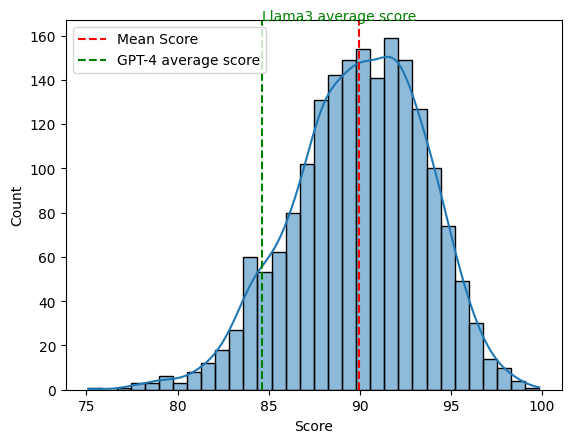

In [6]:
import seaborn as sns

import matplotlib.pyplot as plt

# Remove NaN values from the 'Score' column
df_cleaned = df.dropna(subset=['Score'])

# Create the distribution plot
ax = sns.histplot(data=df_cleaned, x='Score', kde=True)

# Add mean line
mean_score = df_cleaned['Score'].mean()
ax.axvline(mean_score, color='red', linestyle='--', label='Mean Score')

# Add vertical line at 82.2 with text
vertical_line_pos = 84.628047
ax.axvline(vertical_line_pos, color='green', linestyle='--', label='GPT-4 average score')
ax.text(vertical_line_pos, ax.get_ylim()[1], 'Llama3 average score', color='green')

# Show the plot
plt.legend()
plt.show()

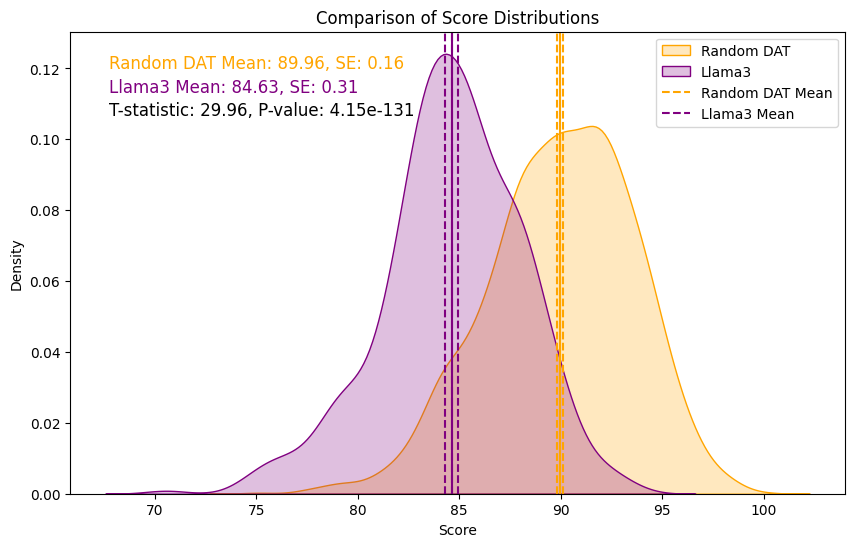

In [7]:
from scipy import stats

# Create a KDE plot for df_cleaned and llama_score
plt.figure(figsize=(10, 6))

# KDE plot for df_cleaned
sns.kdeplot(df_cleaned['Score'], label='Random DAT', color='orange', fill=True)

# KDE plot for llama_score
sns.kdeplot(llama_score, label='Llama3', color='purple', fill=True)

# Add mean lines
plt.axvline(df_cleaned['Score'].mean(), color='orange', linestyle='--', label='Random DAT Mean')
plt.axvline(llama_score.mean(), color='purple', linestyle='--', label='Llama3 Mean')

# Calculate standard error
se_random_dat = 1.96 * df_cleaned['Score'].std() / np.sqrt(len(df_cleaned['Score']))
se_llama3 = 1.96 * llama_score.dropna().std() / np.sqrt(len(llama_score.dropna()))

# Perform corrected t-test for two uneven distributions
t_stat, p_value = stats.ttest_ind(df_cleaned['Score'].values, llama_score.dropna().values, equal_var=False)

# Add labels and legend
plt.xlabel('Score')
plt.ylabel('Density')
plt.title('Comparison of Score Distributions')
plt.legend()
# Add mean lines with standard error
plt.axvline(df_cleaned['Score'].mean(), color='orange', linestyle='-', label='Random DAT Mean')
plt.axvline(df_cleaned['Score'].mean() + se_random_dat, color='orange', linestyle='--', label='Random DAT SE')
plt.axvline(df_cleaned['Score'].mean() - se_random_dat, color='orange', linestyle='--')

plt.axvline(llama_score.mean(), color='purple', linestyle='-', label='Llama3 Mean')
plt.axvline(llama_score.mean() + se_llama3, color='purple', linestyle='--', label='Llama3 SE')
plt.axvline(llama_score.mean() - se_llama3, color='purple', linestyle='--')

# Annotate the plot with statistical test results
plt.text(0.05, 0.95, f"Random DAT Mean: {df_cleaned['Score'].mean():.2f}, SE: {se_random_dat:.2f}", transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', color='orange')
plt.text(0.05, 0.90, f"Llama3 Mean: {llama_score.mean():.2f}, SE: {se_llama3:.2f}", transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', color='purple')
plt.text(0.05, 0.85, f"T-statistic: {t_stat:.2f}, P-value: {p_value:.2e}", transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', color='black')

# Show the plot
plt.show()